# Descriptive Analytics

This practical exercise will focus on using Python and R to provide some of the basic information regarding some set of data.

We'll start by importing some modified real-world network traffic data from */data/network_traffic.csv*.

Note: 

>The sample is a ~500K CSV with summary of some real network traffic data from the past. The dataset has ~21K rows and covers 10 local workstation IPs over a three month period. 
Half of these local IPs were compromised at some point during this period and became members of various botnets. 
Can you discover when a compromise has occurred by a change in the pattern of communication? 

>Each row consists of four columns:

>**date**: yyyy-mm-dd (from 2006-07-01 through 2006-09-30)  
**l_ipn**: local IP (coded as an integer from 0-9)  
**r_asn**: remote ASN (an integer which identifies the remote ISP)  
**f**: flows (count of connnections for that day)  

>Reports of "odd" activity or suspicions about a machine's behavior triggered investigations on the following days (although the machine might have been compromised earlier) 
Date : IP 
08-24 : 1 
09-04 : 5 
09-18 : 4 
09-26 : 3 6 

>Retrieved from: http://statweb.stanford.edu/~sabatti/data.html

## Statistics 

Let's begin our exploratory analysis with some basic descriptive statistics. First we'll import pandas and load the data from the csv.

In [1]:
import pandas as pd
from pprint import pprint

dta = pd.read_csv("data/network_traffic.csv")

Pandas labels rows and columns with **indices** we can use to access the data. We'll see what they are and then use them. But first we'll set the maximum rows to display so we don't fill up our screen with data.

In [2]:
pd.set_option("max.rows", 15)

In [3]:
dta.index

RangeIndex(start=0, stop=20803, step=1)

Looks like we have 20804 rows of data. How about columns? From the description, we should expect four columns.

In [4]:
dta.columns

Index(['date', 'l_ipn', 'r_asn', 'f'], dtype='object')

Using our column names and row indices we can select parts of the data.
Using two different syntaxes we can select an entire column and Pandas will return a **Series** object, similar to a one-dimensional dataframe. First is the attribute lookup:

In [5]:
dta.date

0        2006-07-01
1        2006-07-01
2        2006-07-01
3        2006-07-01
4        2006-07-01
5        2006-07-01
6        2006-07-01
            ...    
20796    2006-09-30
20797    2006-09-30
20798    2006-09-30
20799    2006-09-30
20800    2006-09-30
20801    2006-09-30
20802    2006-09-30
Name: date, Length: 20803, dtype: object

Second is the **getitem** syntax, using our column headings:

In [6]:
dta['date']

0        2006-07-01
1        2006-07-01
2        2006-07-01
3        2006-07-01
4        2006-07-01
5        2006-07-01
6        2006-07-01
            ...    
20796    2006-09-30
20797    2006-09-30
20798    2006-09-30
20799    2006-09-30
20800    2006-09-30
20801    2006-09-30
20802    2006-09-30
Name: date, Length: 20803, dtype: object

To keep the DataFrame data type, we use a list as an index, which allows us to pull out multiple columns as well.

In [7]:
dta[['date']]

,date
0,2006-07-01
1,2006-07-01
2,2006-07-01
3,2006-07-01
4,2006-07-01
5,2006-07-01
6,2006-07-01
...,...
20796,2006-09-30
20797,2006-09-30


Or:

In [8]:
dta[['l_ipn', 'f']]

,l_ipn,f
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,13
...,...,...
20796,8,1
20797,8,1


Now let's take a look at the first few records in the data using `DataFrame.head`. It should look fairly straightforward in accordance with the description of the data above.

In [9]:
dta.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


Next, we can use `DataFrame.describe` to get some summary statistics of our data.

In [10]:
dta.describe()

,l_ipn,r_asn,f
count,20803.000000,20803.000000,20803.000000
mean,4.228236,12138.320338,93.914243
std,3.278183,9766.324252,5764.995269
min,0.000000,3.000000,1.000000
25%,1.000000,4323.000000,1.000000
50%,4.000000,8764.000000,2.000000
75%,7.000000,17676.000000,8.000000
max,9.000000,40092.000000,784234.000000


Can we really interpret a mean or standard deviation for an IP address or AS number? They certain are numbers, but they are not numerical data, they are categorical. Let's remedy that.

We can use `DataFrame.info` to check all of the data types.

In [11]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 4 columns):
date     20803 non-null object
l_ipn    20803 non-null int64
r_asn    20803 non-null int64
f        20803 non-null int64
dtypes: int64(3), object(1)
memory usage: 650.2+ KB


We can also use the `dtypes` attribute of DataFrames to check data types. 

In [12]:
dta.dtypes[['date', 'l_ipn', 'r_asn', 'f']]

date     object
l_ipn     int64
r_asn     int64
f         int64
dtype: object

We see that the date is stored as a string in the **numpy** `object` dtype. The other columns are stored as integers. We can use the **apply** function to modify the data type for the date field.

In [13]:
dta.date = dta.date.apply(pd.to_datetime)
dta.date

0       2006-07-01
1       2006-07-01
2       2006-07-01
3       2006-07-01
4       2006-07-01
5       2006-07-01
6       2006-07-01
           ...    
20796   2006-09-30
20797   2006-09-30
20798   2006-09-30
20799   2006-09-30
20800   2006-09-30
20801   2006-09-30
20802   2006-09-30
Name: date, Length: 20803, dtype: datetime64[ns]

For the other two categorical fields, we can use the **astype** function to cast to the Pandas *Categorical* type.

In [14]:
dta.l_ipn = dta.l_ipn.astype('category')
dta.r_asn = dta.r_asn.astype('category')

Let's take another look at our data and see what we have done.

In [15]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 4 columns):
date     20803 non-null datetime64[ns]
l_ipn    20803 non-null category
r_asn    20803 non-null category
f        20803 non-null int64
dtypes: category(2), datetime64[ns](1), int64(1)
memory usage: 482.1 KB


Now we can use describe again to get those summary statistics.

In [16]:
dta.describe()

,f
count,20803.000000
mean,93.914243
std,5764.995269
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,784234.000000


Where did our other fields go?! The `describe` function only displays numerical data by default. We can change that functionality:

In [17]:
dta.describe(include='category')

,l_ipn,r_asn
count,20803,20803
unique,10,2005
top,0,3561
freq,3980,483


Or we can only pass categorical fields to the describe function:

In [18]:
dta.select_dtypes(['category']).describe()

,l_ipn,r_asn
count,20803,20803
unique,10,2005
top,0,3561
freq,3980,483


Or we can just look at everything at once:

In [19]:
dta.describe(include='all')

,date,l_ipn,r_asn,f
count,20803,20803.0,20803.0,20803.000000
unique,92,10.0,2005.0,NaN
top,2006-07-26 00:00:00,0.0,3561.0,NaN
freq,372,3980.0,483.0,NaN
first,2006-07-01 00:00:00,NaN,NaN,NaN
last,2006-09-30 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,93.914243
std,NaN,NaN,NaN,5764.995269
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,1.000000


## Descriptive Statistics using R

For this notebook we will load the rpy2.ipython extension to allow R magics in this Python notebook. We can use the dataframe already created in the **_R_** code. Alternatively we can load from the csv in **_R_**.

In [20]:
%load_ext rpy2.ipython

To get a similar output to Pandas' `describe`, we can use `summary()` in **_R_**. First we can import and use the DataFrame from our previous example:

In [21]:
%%R -i dta 
summary(dta)

/srv/conda/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "l_ipn". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))
/srv/conda/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "r_asn". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))
/srv/conda/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


      date                        l_ipn              r_asn          
 Min.   :2006-07-01 00:00:00   Length:20803       Length:20803      
 1st Qu.:2006-07-23 00:00:00   Class :character   Class :character  
 Median :2006-08-11 00:00:00   Mode  :character   Mode  :character  
 Mean   :2006-08-13 06:11:51                                        
 3rd Qu.:2006-09-04 00:00:00                                        
 Max.   :2006-09-30 00:00:00                                        
       f           
 Min.   :     1.0  
 1st Qu.:     1.0  
 Median :     2.0  
 Mean   :    93.9  
 3rd Qu.:     8.0  
 Max.   :784234.0  


Next we will creat an **_R_** dataframe and call `summary` on that:

In [22]:
%%R
data <- read.csv(file="data/network_traffic.csv")
summary(data)

         date           l_ipn           r_asn             f           
 2006-07-26:  372   Min.   :0.000   Min.   :    3   Min.   :     1.0  
 2006-07-25:  358   1st Qu.:1.000   1st Qu.: 4323   1st Qu.:     1.0  
 2006-07-27:  352   Median :4.000   Median : 8764   Median :     2.0  
 2006-07-28:  345   Mean   :4.228   Mean   :12138   Mean   :    93.9  
 2006-07-24:  333   3rd Qu.:7.000   3rd Qu.:17676   3rd Qu.:     8.0  
 2006-08-10:  315   Max.   :9.000   Max.   :40092   Max.   :784234.0  
 (Other)   :18728                                                     


Let's see what data types **_R_** sees the data as:

In [23]:
%%R
sapply(data, class)

     date     l_ipn     r_asn         f 
 "factor" "integer" "integer" "integer" 


Using the `as.character()` on the columns we changed in Python, we can recast our data types. 

In [24]:
%%R
data$l_ipn <- as.character(data$l_ipn)
data$r_asn <- as.character(data$r_asn)
sapply(data, class)

       date       l_ipn       r_asn           f 
   "factor" "character" "character"   "integer" 


In [25]:
%%R
summary(data)

         date          l_ipn              r_asn                 f           
 2006-07-26:  372   Length:20803       Length:20803       Min.   :     1.0  
 2006-07-25:  358   Class :character   Class :character   1st Qu.:     1.0  
 2006-07-27:  352   Mode  :character   Mode  :character   Median :     2.0  
 2006-07-28:  345                                         Mean   :    93.9  
 2006-07-24:  333                                         3rd Qu.:     8.0  
 2006-08-10:  315                                         Max.   :784234.0  
 (Other)   :18728                                                           


## Visualizations

Now that we have some simple descriptive statistics. Let's try some descriptive visualizations.
First thing we'll do is set a display option allowing matplotlib visualizations to appear in the notebook.

In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

Pandas has a plotting API that utilizes matplotlib under the hood. Let's take a look at some of this functionality using our data set.

We can use Pandas to create a bar plot, perhaps to compare counts of certain groups in the data. Here we will use Pandas' **groupby()**, get the sum of each group and send to the `...plot.bar()` to see if there is anything immediately interesting.

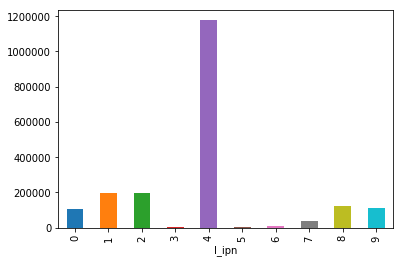

In [28]:
ax = (dta.groupby('l_ipn').f.sum().plot.bar())

Notice that pandas returned to us the matplotlib axes. We could go on and customize these axes should we so desire. Let's rotate **tick labels**, for example.

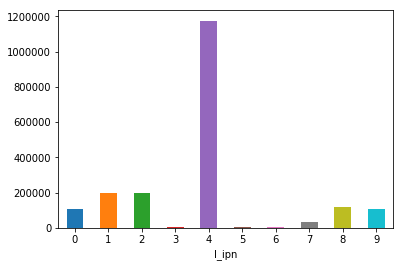

In [29]:
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(0)
    
ax.figure

Lets make the plot a little larger by using `subplots` and `figsize` to explicitly set the size of the figure and the axes. The figure and axes are the two components of a pyplot.

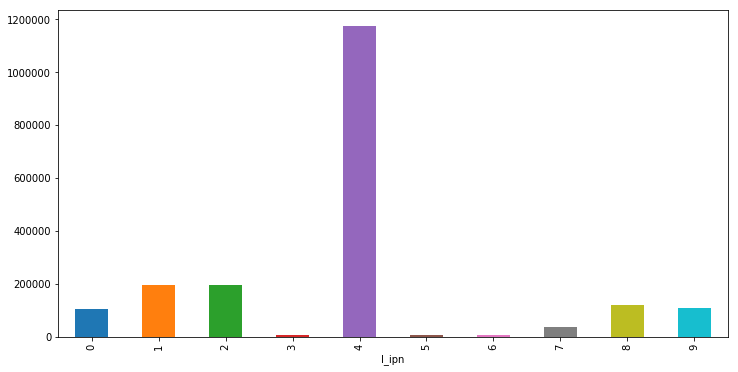

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = (dta.groupby('l_ipn').f.sum().plot.bar())


For the next example we will import the Pandas DataFrame into **_R_** and use ggplot2 to visualize the same data. Let's simplify our DataFrame into the specific data we wish to visualize. The following code creates a Pandas _Series_ using `groupby()` and the sum of the `f` fields for each IP address. Then we create a new DataFrame called `dataf` using the indices of the series, which correspond to the IP address above, and the values of the series which are the sums of the flows.

In [31]:
#creates a Series object, grouping the data by IP address and calculating the sum of the 'f' attribute for each one
dtas = dta.groupby('l_ipn').f.sum()

#R will work nicely with a DataFrame, so we make one out of our one-dimensional Series
dataf = pd.DataFrame({'l_ipn':dtas.index, 'flows':dtas.values})

#disply our new DataFrame
dataf

,l_ipn,flows
0,0,105177
1,1,195691
2,2,195713
3,3,4904
4,4,1175417
5,5,5780
6,6,6674
7,7,35362
8,8,120203
9,9,108777


First we will use an **_R_** line maginc and the `require()` command to use the ggplot2 library.

In [35]:
%R require(ggplot2)

array([1], dtype=int32)

Now we will use our DataFrame as an input and see what it looks like in **_R_**. The next command implements an **_R_** cell, importing the DataFrame, `dataf`. An accompanying method `fortify()` implicitly makes the conversion between the Pandas DataFrame type and the **_R_** dataframe type. 

In [45]:
%%R -i dataf
dataf

/srv/conda/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "l_ipn". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


  l_ipn   flows
0     0  105177
1     1  195691
2     2  195713
3     3    4904
4     4 1175417
5     5    5780
6     6    6674
7     7   35362
8     8  120203
9     9  108777


Next we use the `<-` assignment operator to create a table with the `rbind()` method. Then the `barplot()` method displays a simple bar plot of the data.

In [47]:
%%R -i dataf
#create a table, a, from the dataframe
a <- rbind(dataf$l_ipn, dataf$flows)
#display the table, notice R indexes starting with '1'
a

     [,1]     [,2]     [,3]     [,4]   [,5]      [,6]   [,7]   [,8]    [,9]    
[1,] "0"      "1"      "2"      "3"    "4"       "5"    "6"    "7"     "8"     
[2,] "105177" "195691" "195713" "4904" "1175417" "5780" "6674" "35362" "120203"
     [,10]   
[1,] "9"     
[2,] "108777"


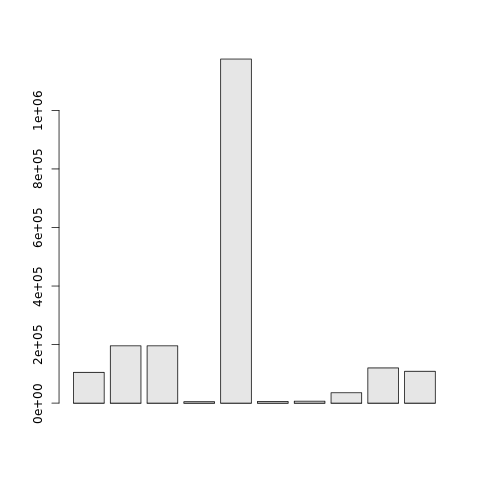

array([ 0.7,  1.9,  3.1,  4.3,  5.5,  6.7,  7.9,  9.1, 10.3, 11.5])

In [49]:
#create a simple bar plot
%R barplot(a)